# CMSC320 Final Project: Data Science Pipeline Tutorial

## Outline:

- 1. Introduction
    - 1.1 Purpose of this Program
- 2. Set Up
    - 2.1 Obtaining the Data
- 3. Tidying the Data
    - 3.1 Filtering Data
    - 3.2 Unneeded Data
    - 3.3 Missing Data
    - 3.4 Simplifying Data
    - 3.5 Changing Data Types
    - 3.6 Creating New Data Column
- 4. Exploratory Data Analysis and Visualization 
    - 4.1 Numerical Data
    - 4.2 Categorical Data
    - 4.3 Summary
- 5. Machine Learning Algorithm
    - 5.1 Decision Tree Model
    - 5.2 Linear Regression Model

## 1. Introduction

This tutorial walks you through the Data Science pipeline of data curation, parsing and management, expoloratory data analysis, hypothesis testing, and machine learning. The data set used in this tutorial is the Heart Failure Prediction data set is found in Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. This data set was chosen because it gives us a large number of records while also giving us the opportunity to walk through the entire pipeline. I hope you enjoy the tutorial!

### 1.1. Purpose of this Program

Before the COVID-19 pandemic, the United States movie box office alone raked in \\$11.3 billion in 2019 while the world wide box office totaled \\$42.2 billion. Movie companies put in a large amount of effort making sure that their films turn a profit, including hiring the reputable directors and actors, spending money on advertising and marketing, scheduling certain release dates (ex: more movies are released around the summer time or major holidays), and various other factors. The budgets for movies tend to be an expensive investment, but the pay off for a successful movie is what spurs movie businesses to continue creating movies.

Movie production companies often attempt to project how well an unreleased movie would perform, and often refuse to greenlight certain movies because they are concerned that it will be unable to turn a profit. Due to the high risk high reward, it is important for companies to identify which movies are a worthy investment of a larger budget.  Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. 

The below program will take a data base of movies and determine what factors impact it's box office performance and ultimately be able to create an efficient prediction algorithm to identify whether a given movie would be profitable for the company

## 2. Set Up

Below are packages that we will be using for this tutorial.

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Run this to get rid of scienctific notation in pandas

In [352]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2.1. Obtaining the Data

The data set is avaliable through this link: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

Click the download button on the right, which will download a zipped file of the data set. Unzip the tmdb_5000_movies.csv data file and move it to the appropriate folder where your code file is also located. This way, you will be able to access the csv data file. If you do not want to cannot move the csv file to the appropriate folder, use the path for csv file instead of the "tmdb_5000_movies.csv". 

Once you have completed the above steps, we can read the data into our notebook using pandas. 

In [353]:
movies = pd.read_csv("tmdb_5000_movies.csv") # or the appropriate path name
movies.head() # displaying the first 5 entries of the movie data set

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.200,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.900,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.300,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.600,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.100,2124


Pandas has loaded all the data from heart.csv into the dataframe stored in the variable **movies**. A pandas dataframe is a 2 dimensional labeled data structure with columns, similar to a table or Excel Spreadsheet. Now that we have read our csv file into a pandas data frame, we can move on to the next step 

**NOTE:** We are not going to include the other data set tmdb_5000_credits.csv because actors and directors have do not have a noticeably significant effect on box office revenue

Source: https://journals.sagepub.com/doi/full/10.1509/jmkg.67.4.103.18692

## 3. Tidying the Data

Unfortunately, there are some inconsistencies in this data file. Although the first few rows do not indicate that there are missing data values, we should check to ensure there are no missing data values, at it may affect future calculations. Furthermore, some of the data elements are not the most helpful in it's current form (ex: genres should just be one word), and some columns do not contain relavant information that we need in determining how well a movie will perform (ex: homepage)

### 3.1. Filtering Data

We will only be dealing with movies that have already been released, not rumored to be released, so we will filter out and only use released movies as movies that have not been released would not have box office revenue data

In [354]:
movies = movies[movies['status'] == 'Released']

movies = movies.drop(columns=['status']) # drop the status column since all the statuses are released movies

**Note:** You can filter data like above, or you can also take advantage of the pandas.DataFrame filter() function. To read more about this, refer to the link below, which provides the syntax and examples on how to use the function

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

### 3.2. Unneeded Data

There are several columns within this data set that are not relavant factors that impact box office performance.

Let's first list out the columns to see what all of them are:

In [355]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

The column 'homepage' is unneeded as it is just a link to the movie webset. There are two title columns, so we will drop the 'original_title' as well as the 'id' column. The 'overview', 'tagline', and 'keywords' columns contains brief summaries of the movie, but all information from this column can be conveyed through the columns 'genres'. The 'spoken_languages' column can be covered 'original_language' column and 'vote_count' doesn't have much impact on the revenue (seems to have more impact on the credibility of the the 'vote_average').

In [356]:
movies = movies.drop(columns=['homepage', 'original_title', 'overview', 'spoken_languages', 
                              'tagline', 'vote_count', 'keywords', 'id'])

In [357]:
# reordering the columns 
movies = movies[['title', 'budget', 'revenue', 'vote_average', 'genres', 'original_language', 'popularity',
                 'production_companies', 'production_countries', 'release_date', 'runtime']]

movies.head()

,title,budget,revenue,vote_average,genres,original_language,popularity,production_companies,production_countries,release_date,runtime
0,Avatar,237000000,2787965087,7.200,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.000
1,Pirates of the Caribbean: At World's End,300000000,961000000,6.900,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.000
2,Spectre,245000000,880674609,6.300,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.000
3,The Dark Knight Rises,250000000,1084939099,7.600,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.000
4,John Carter,260000000,284139100,6.100,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.000


### 3.3. Missing Data

It's important to ensure that this data set does not contain any missing values, as missing values can inhibit calculations done on the data later, and can also possibly introduce bias into the data set.

There are several missing values in the columns genres, production_companies and production_countries denoted by the string '[ ]'. It is difficult to be able to fill in these missing values, so we will simply remove these movie entities from our data set.

In [358]:
movies = movies[movies['genres'] != '[]'] # filtering out movies with missing info of genres
movies = movies[movies['production_companies'] != '[]'] # removing movies with missing info on production companies
movies = movies[movies['production_countries'] != '[]'] # removing movies with missing info on production countries

Furthermore, there is impossible that a movie can have a budget of zero, or else a movie would not be able to be made, therefore, we will also remove these movies from our data set as it it is a missing data value and hard to predict the budget of different movies. Furthermore, the chances of a movie to make a revenue of 0 is extremely rare, that indicates missing data, and as predicting the revenue of a different movies is arbitrary as well, will filter this out as well

In [359]:
movies = movies[movies['budget'] > 0]
movies = movies[movies['revenue'] > 0]

We can detect missing values that are NaN use the **isna()** and **sum** function

In [360]:
movies.isna().sum()

title                   0
budget                  0
revenue                 0
vote_average            0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
dtype: int64

Since there is only two missing data values in the runtime category, we can simply replace the null values with the average runtime, so that it will not skew the data set, using the function **fillna()**

In [361]:
movies['runtime'] = movies['runtime'].fillna(int(movies['runtime'].mean()))

Now let's use **isna()** and **sum()** to check that we have addressed all null values

In [362]:
movies.isna().sum()

title                   0
budget                  0
revenue                 0
vote_average            0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
dtype: int64

Since there are no na values, we are have most all missing values accounted for. We can now proceed onto the next step of data tidying. Before we do that, let's reset the row indexes so we can easily access them later without going out of bounds

**Note:** Instead of using the isna() function, we can also import the missingno library and utilize the heatmap() or matrix() function for a more visual representation of the missing null data

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

In [363]:
movies = movies.reset_index(drop=True)

### 3.4. Simplifying Data Elements

Columns genres, production_companies, and production_countries have their data stored in strings that resemble json files. However, this is not the easiest to read, or to categorize. Therefore, it is better extract the key words from these string for categorization later.

First, let's take a look at an element from each of these columns

In [364]:
print("Genre:", movies.iloc[1]['genres'], '\n') # accessing the genre of the first element
print("Company:", movies.iloc[0]['production_companies'], '\n') # accessing the genre of the first element
print("Country:", movies.iloc[0]['production_countries']) # accessing the genre of the first element

Genre: [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}] 

Company: [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}] 

Country: [{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]


**Note:** The text here is in the json file format, which might be a bit confusing to understand at first. To better understand the formatting of a json file, read about it here: https://docs.fileformat.com/web/json/

To simplify this data processing, we'll extract the very first element from the list, with the exmaple above, genre would be 'Action', company is 'Ingenious Film Partners' and contry is 'US'

In [365]:
movies['production_companies'].str.extract(r'\[\{"name": "((\w+ *)*).*')

,0,1
0,Ingenious Film Partners,Partners
1,Walt Disney Pictures,Pictures
2,Columbia Pictures,Pictures
3,Legendary Pictures,Pictures
4,Walt Disney Pictures,Pictures
...,...,...
3180,Miramax Films,Films
3181,Dreamland Productions,Productions
3182,Daiei Studios,Studios
3183,Thinkfilm,Thinkfilm


In [366]:
movies['genres'] = movies['genres'].str.extract(r'\[\{"id": \d+, "name": "(\w+).*')
movies['production_countries'] = movies['production_countries'].str.extract(r'\[\{"iso_3166_1": "(\w+).*')

# we need to account for the fact the production company can have multiple words in the name
reg = movies['production_companies'].str.extract(r'\[\{"name": "((\w+ *)*).*')

# reg can have multiple elements
movies['production_companies'] = reg[0]

### 3.5. Changing Data Types

The release_date column is a string right now, but it would be more helpful it was a date time object. Furthermore, it would probably be more helpful to only extract the month, as movies seem to do better when they are released either in the summer months or near the end of the year, rather than at the beginning of the year

In [367]:
movies['release_date']= pd.to_datetime(movies['release_date']) # converting to date time object
movies['release_month'] = movies['release_date'].dt.month # extracting release month and putting into new column
movies = movies.drop(columns=['release_date']) # deleteing release_date column

### 3.6. Creating New Data Column

We don't have a column for profit. A movie can generate a lot of revenue, but if it does not break even, then it is essentially less profitable than a movie that generates less revenue but exceeds it's budget. 

The profit of a movie = revenue - budget.

In [368]:
movies['profit'] = movies['revenue'] - movies['budget'] # storing in new 'profit' column

Displaying final result

In [369]:
movies

,title,budget,revenue,vote_average,genres,original_language,popularity,production_companies,production_countries,runtime,release_month,profit
0,Avatar,237000000,2787965087,7.200,Action,en,150.438,Ingenious Film Partners,US,162.000,12,2550965087
1,Pirates of the Caribbean: At World's End,300000000,961000000,6.900,Adventure,en,139.083,Walt Disney Pictures,US,169.000,5,661000000
2,Spectre,245000000,880674609,6.300,Action,en,107.377,Columbia Pictures,GB,148.000,10,635674609
3,The Dark Knight Rises,250000000,1084939099,7.600,Action,en,112.313,Legendary Pictures,US,165.000,7,834939099
4,John Carter,260000000,284139100,6.100,Action,en,43.927,Walt Disney Pictures,US,132.000,3,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...
3180,Clerks,27000,3151130,7.400,Comedy,en,19.749,Miramax Films,US,92.000,9,3124130
3181,Pink Flamingos,12000,6000000,6.200,Horror,en,4.554,Dreamland Productions,US,93.000,3,5988000
3182,Cure,20000,99000,7.400,Crime,ja,0.212,Daiei Studios,JP,111.000,11,79000
3183,Primer,7000,424760,6.900,Science,en,23.308,Thinkfilm,US,77.000,10,417760


**Note:** This data set pretty clean, other data sets would have more to do in this data tidying proccess, such as dealing with missing values, typos, etc.

## 4. Exploratory Data Analysis and Visualization

Exploratory Data Analysis (EDA) is the initial process of combing through a dataset to try and find patterns and make hypotheses that you might have about the data. EDA is important because it gives us more context about the data being handled and may give us more ideas about what we can do with the data in the future.

### 4.1. Numerical Data

The matrix below is a Spearman correlation matrix that showcases the correlation values between each quantative variable included in the dataset, that is the budget, revenue, vote_average, popularity, and runtime. In the matrix below, the darker boxes represent variables that are highly correlated with each other. The lighter blue and green boxes are less correlated variables. The lighter yellow/cream colored boxes represent variables that are negatively correlated. We should examine which variables are the most correlated with revenue.

**Note:** To understand a litte more in depth about how Spearman's correlation is calculated, as well as the different ways to customize the your own matrix, consult the links below

https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

Spearman's matrix throught pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Heatmaps (for the matrix visualization): https://seaborn.pydata.org/generated/seaborn.heatmap.html

[Text(0, 0.5, 'budget'),
 Text(0, 1.5, 'revenue'),
 Text(0, 2.5, 'vote_average'),
 Text(0, 3.5, 'popularity'),
 Text(0, 4.5, 'runtime'),
 Text(0, 5.5, 'release_month'),
 Text(0, 6.5, 'profit')]

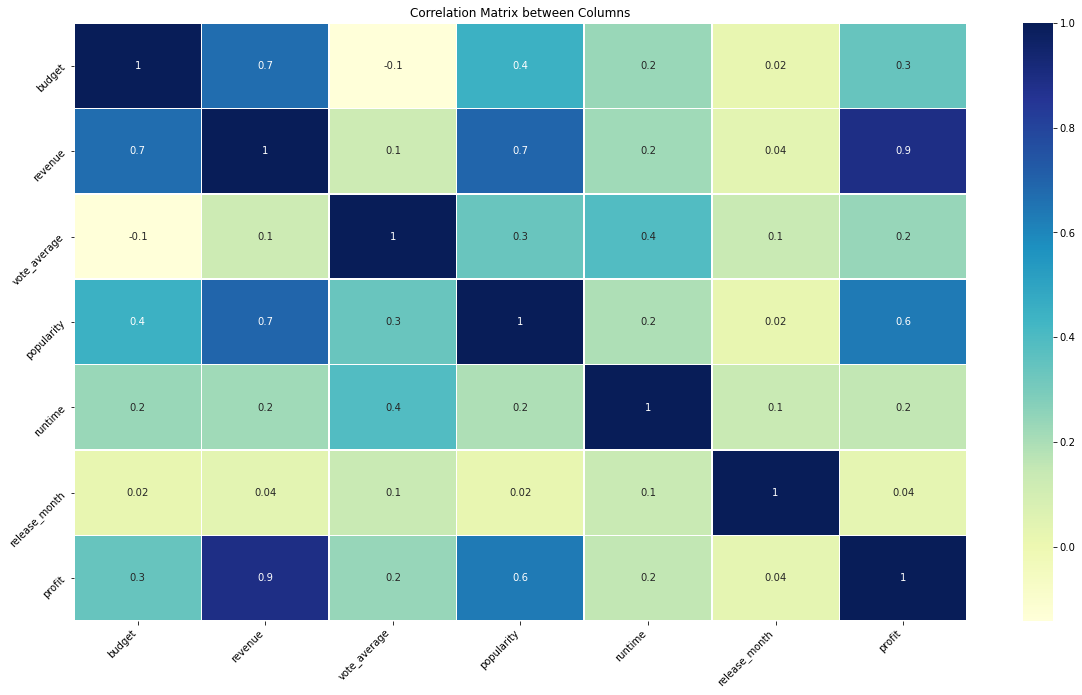

In [370]:
#Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(movies.corr("spearman"), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

The varibales budget and revenue are the most positively correlated with profit (revenue is a given), while the vote average, budget and runtime have a lesser correlation. The vote-average and popularity as well as the runtime and vote-average appear to have some correlation, therefore, we should consider these when creating our prediction model.

**Note:** Ignore the release_month row, as that should be more of a categorical variable that we will explore more in depth below

### 4.2. Categorical Data

The variables genres, original language, production companies, production country and release month all categorical data values, therefore, the correlation matrix is not useful in that respect. 

For each variable, we will emply these following steps:
1. Group by the variable and determine the categorical variable
2. Create a distribution subplot to understand the distribution of each category to better compare these

To learn more about violin plots and how to create/edit them in python, check out the following links below:

What are violin plots: https://mode.com/blog/violin-plot-examples/

How to create/edit plots: https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/

**Genres**

Setting up for the violin plot by grouping the data in lists based off of genre

In [371]:
# create an 2-D np array where each row represents a genre
rev_per_genre = list() # each year has 142 entries

# looping through data grouped by genre
for name, group in movies.groupby(movies.genres):
    lst = list(group['profit']) # list of the different revenues per genre
    rev_per_genre.append(np.array(lst))

# Creating the x-axis of genres
genre_list = movies.genres.unique().tolist()
genre_list.insert(0, "") # inserting this for padding on the graph

Graphing the violin plot

Text(0.5, 1.0, 'Revenue vs Genre')

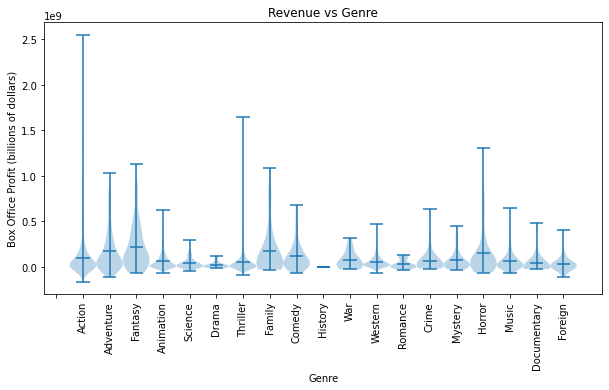

In [372]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(np.arange(0, 20)) 
num = range(1,20) # temp numerical x axis tic marks

# graphing the life expectancy vs years
ax.violinplot(rev_per_genre, num, widths=1,showmeans=True)

# Renaming the tick marks
ax.set_xticklabels(genre_list, rotation = (90))

# adjusting labels
ax.set_xlabel("Genre")
ax.set_ylabel("Box Office Profit (billions of dollars)")
ax.set_title("Revenue vs Genre")

Action and Horror seem to have the highest returns, but Action, Adventure, Fantast Family and Horror seems to have the highest mean returns. Although Action can have high returns, there also seems to be many instances where there are negative returns. With all the genres, they are all heavily skewed to the right, with most movies not turning much of a profit but a few being extrememly successful.

**Original Language**

Setting up for the violin plot by grouping the data in lists based off of original language

In [373]:
# create an 2-D np array where each row represents a different language
rev_per_lang = list() # each year has 142 entries

# looping through data grouped by language
for name, group in movies.groupby(movies.original_language):
    lst = list(group['profit']) # list of the different revenues per language
    rev_per_lang.append(np.array(lst))

# Creating the x-axis of langauages
lang_lst = movies.original_language.unique().tolist()
lang_lst.insert(0, "")

Graphing the Violin plot

Text(0.5, 1.0, 'Revenue vs Original Language')

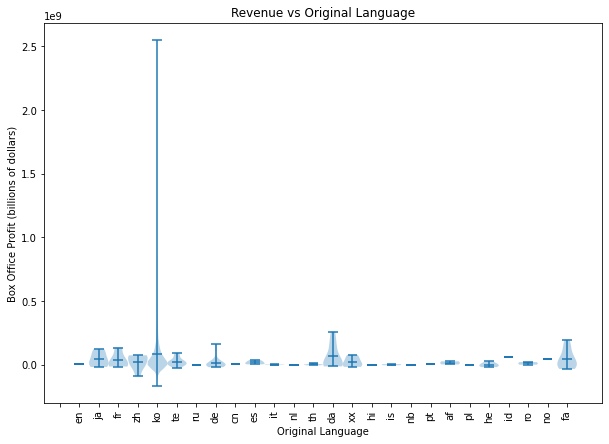

In [374]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(np.arange(0, len(lang_lst)))
num = range(1,len(lang_lst)) # temp numerical x axis tic marks

# graphing the life expectancy vs years
ax.violinplot(rev_per_lang, num, widths=1,showmeans=True)

# Renaming the tick marks
ax.set_xticklabels(lang_lst, rotation = (90))

# adjusting labels
ax.set_xlabel("Original Language")
ax.set_ylabel("Box Office Profit (billions of dollars)")
ax.set_title("Revenue vs Original Language")

It doesn't look that original langauge has any significant effect on the box office, as seen all the averages seem to be around the same for all different types of languages. Therefore, original languages is an extraneous variable that can not be factored into the prediction model

**Production Companies**

In [375]:
print("Number of Production Companies:", len(movies['production_companies'].unique()))

Number of Production Companies: 744


Since there are so many different production companies, a violin plot would be unhelpful just because of the sheer amount of data being displayed. Therefore, let's just find the total and average revenue of each company to see which companies are the most profitable.

The total revenue indicates which companies are able to generate the most overall revenue

In [376]:
total = movies.groupby(['production_companies'], as_index=False)['profit'].sum().sort_values('profit', ascending=False)
total

,production_companies,profit
500,Paramount Pictures,26044128995
690,Universal Pictures,24621286498
709,Walt Disney Pictures,19286420012
143,Columbia Pictures,17729819796
681,Twentieth Century Fox Film Corporation,16266904544
...,...,...
657,Threshold Entertainment,-64926294
532,Punch Productions,-72888950
701,Vnesheconombank,-73821041
380,Le Studio Canal,-87982678


Graphing the top profit earning companies 

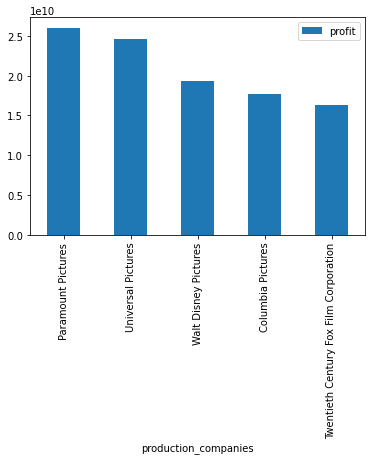

In [377]:
ax1 = total.head().plot.bar(x='production_companies', y='profit', rot=90)

The range of box office profits has a lot of variation, with the highest total profit being about \\$26 billion and the lowest being a negative profit of about $-2.2 billion. Based off of this data, the top total revenue earners are Paramount, Universal, Walt Disney, Columbia and Twentieth Century Fox. However, even though they earn the most revenue, do they consistently earn revenue for all their movies, or just because they produce more movies than the lower earners? 

Let's look at the average earners.

In [378]:
avg = movies.groupby(['production_companies'], as_index=False)['profit'].mean().sort_values('profit', ascending=False)
avg

,production_companies,profit
506,Patalex IV Productions Limited,745921036.000
1,1492 Pictures,593136834.250
420,Marvel Studios,555182620.100
515,Pixar Animation Studios,539338880.000
727,WingNut Films,538646243.100
...,...,...
525,Prana Animation Studios,-51337973.000
152,Conundrum Entertainment,-61403089.000
657,Threshold Entertainment,-64926294.000
701,Vnesheconombank,-73821041.000


Graphing top companies that earn the most on average per movie

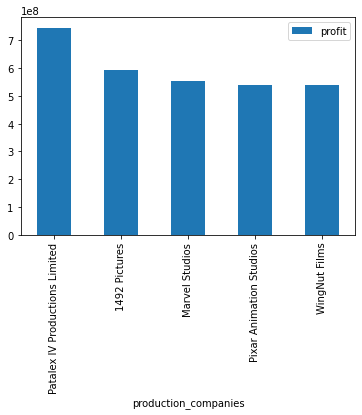

In [379]:
ax2 = avg.head().plot.bar(x='production_companies', y='profit', rot=90)

The top most profitable companies on average (meaning they are consistently profitable) are different from the top profit earners, which indicates that the companies that generate more revenue don't generate the most money per movie, rather, they make more movies, which allows them to earn more profit.

More successful companies have a name brand, so it is important to consider production company as a predictor variable

**Note:** To see more on how to configure boxplots (such as adjusting the colors, creating a legend, etc.) consult the link below:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

**Production Country**

Setting up for the violin plot by grouping the data in lists based off of production country

In [380]:
# create an 2-D np array where each row represents a country
rev_per_country = list() # each year has 142 entries

# looping through data grouped by genre
for name, group in movies.groupby(movies.production_countries):
    lst = list(group['profit']) # list of the different revenues per country
    rev_per_country.append(np.array(lst))

# Creating the x-axis of countries
country_list = movies.production_countries.unique().tolist()
country_list.insert(0, "")

Creating the violin plot

Text(0.5, 1.0, 'Revenue vs Production Country')

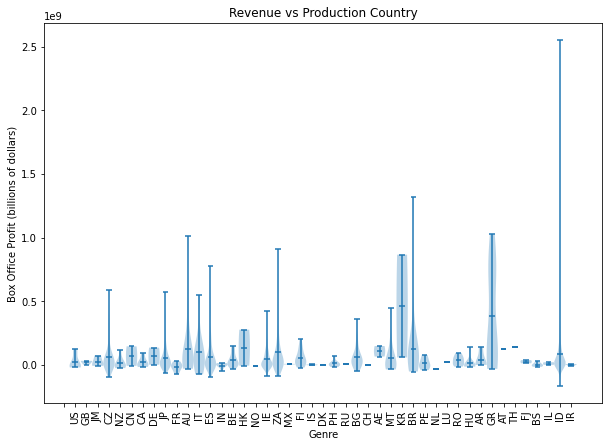

In [381]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(np.arange(0, len(country_list)))
num = range(1,len(country_list)) # temp numerical x axis tic marks

# graphing the Revenue vs Production Country
ax.violinplot(rev_per_country, num, widths=1,showmeans=True)

# Renaming the tick marks
ax.set_xticklabels(country_list, rotation = (90))

# adjusting labels
ax.set_xlabel("Genre")
ax.set_ylabel("Box Office Profit (billions of dollars)")
ax.set_title("Revenue vs Production Country")

Some countries generate a lot more total profit than others. Note the violin plots for Greece (GR), South Korea (KR), Brazil (BR), Australia (AU), and Italy (IT). Production country could possibly be a good indicator for how profitable a movie would be

**Release Month**

Setting up for the violin plot by grouping the data in lists based off of release month

In [382]:
# create an 2-D np array where each row represents a genre
rev_per_month = list() # each year has 142 entries

# looping through data grouped by genre
for name, group in movies.groupby(movies.release_month):
    lst = list(group['profit']) # list of the different revenues per language
    rev_per_month.append(np.array(lst))

# Creating the x-axis of genres
month_list = movies.release_month.unique().tolist()
month_list.insert(0, "")

Graphing the violin plot

Text(0.5, 1.0, 'Revenue vs Release Month')

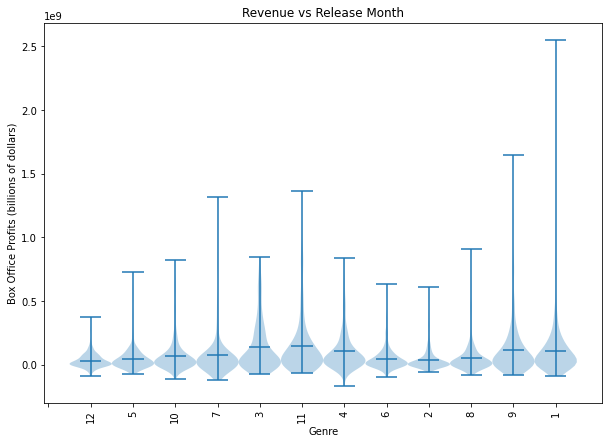

In [383]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(np.arange(0, len(month_list)))
num = range(1,len(month_list)) # temp numerical x axis tic marks

# graphing the life expectancy vs years
ax.violinplot(rev_per_month, num, widths=1,showmeans=True)

# Renaming the tick marks
ax.set_xticklabels(month_list, rotation = (90))

# adjusting labels
ax.set_xlabel("Genre")
ax.set_ylabel("Box Office Profits (billions of dollars)")
ax.set_title("Revenue vs Release Month")

The average profit across the months are about the same, therefore, release month is not a needed indicator for the prediction model.

### 4.3 Summary

Out of the categorical variables, genres, production companies, and production country have possible correlation with box office profits. The other variables are extraneous information, and including them within the prediction model could result in overfitting the data to the training data for the next section.

## 5. Machine Learning Algorithm

In the last section. we visualized the data to help a better understanding of how box office profits related to the categorical and qualatative variables of this data set. We correlated each qualatative column and had a better understanding how the attribute groups are correlated with each other. 

In this section, we want to build a machine learning model from these features-label pairs, which comprise our training set. The goal is to make accurate predictions for new, never-before-seen data.

### 5.1. Data Standardization

Using the fit_transform included in the sklearn.preprocessing.LabelEncoder library, we can transform our categorical data into numerical values, as our machine learning model can better process numerical data. To read more into the other functions found within the LabelEncoder, check out the link below:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [384]:
categorical = ['genres', 'production_companies', 'production_countries'] # categorical variables we want to include
le = sklearn.preprocessing.LabelEncoder()

for column in categorical: # looping through each of the columns to 
    movies[column] = le.fit_transform(movies[column])

In [390]:
movies # what the dataframe looks like now

,title,budget,revenue,vote_average,genres,original_language,popularity,production_companies,production_countries,runtime,release_month,profit
0,Avatar,4.795,2787965087,0.818,0,en,4.824,331,43,2.200,12,2550965087
1,Pirates of the Caribbean: At World's End,6.227,961000000,0.545,1,en,4.401,709,43,2.480,5,661000000
2,Spectre,4.977,880674609,0.000,0,en,3.222,143,18,1.640,10,635674609
3,The Dark Knight Rises,5.091,1084939099,1.182,0,en,3.406,381,43,2.320,7,834939099
4,John Carter,5.318,284139100,-0.182,0,en,0.862,709,43,1.000,3,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...
3180,Clerks,-0.590,3151130,1.000,3,en,-0.037,444,43,-0.600,9,3124130
3181,Pink Flamingos,-0.591,6000000,-0.091,11,en,-0.602,194,43,-0.560,3,5988000
3182,Cure,-0.590,99000,1.000,4,ja,-0.764,165,30,0.160,11,79000
3183,Primer,-0.591,424760,0.545,15,en,0.095,654,43,-1.200,10,417760


### 5.2. Splitting Data

A general practice for the machine learning model is to split the data, with a large portion of the data going towards the training data (teaching the machine learning model to accurately predict new data), and the smaller portion going towards testing data (to make sure you don't overfit the model to the training data). We will be utilizing 70% of the data for training and 30% for testing, but the size can vary. Read more about the size of splitting the data here:

https://docs.aws.amazon.com/machine-learning/latest/dg/splitting-the-data-into-training-and-evaluation-data.html

In [391]:
# Sepratating & assigning features and target columns to x and y variables

y = movies['profit'] # dependent variables
X = movies.drop(['profit', 'title', 'release_month', 'original_language', 'revenue'],axis=1) # the predictors (independant variables) that are not needed
# we don't want to include revenue as profit is calculated off of this

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # splitting the data with 30% for testing

### 4.3 Model Building & Training

**4.3.2. Decision Tree Model**

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests. To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [393]:
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.844
Decision Tree: Accuracy on test Data: 0.271


The decision tree has a only a 0.304 accuracy in correctly predicting new, unknown data while having an high accuracy rate for the training data. This indicates that overfitting may be a problem in this decision tree. Let's try a different model

**4.3.2. Linear Regression Model**

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [394]:
# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on Training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on Test Data: {:.3f}".format(acc_test_lr))

Linear Regression: Accuracy on Training Data: 0.470
Linear Regression: Accuracy on Test Data: 0.470


The Linear Regression model has a better accuracy than the decision tree, and overfitting is less of a problem here!

## Conclusion

With this tutorial, we set out to analyze the box office profits relationship with budget, vote average, genres, original language, popularity, production companies, production countries, runtime, release month. From data analysis and visualization part, we know that the box office profit is related to the budget, vote average, genres, popularity, production companies, production countries, and runtime. 

During the machine learning part, I used Linear Regression model and Decision tree model to predict the box office profit of unknown movies. We know that for this data, use Linear Regression to predict is better than use decision tree.